<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/main/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [66]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# **Todo o dataset**

In [ ]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


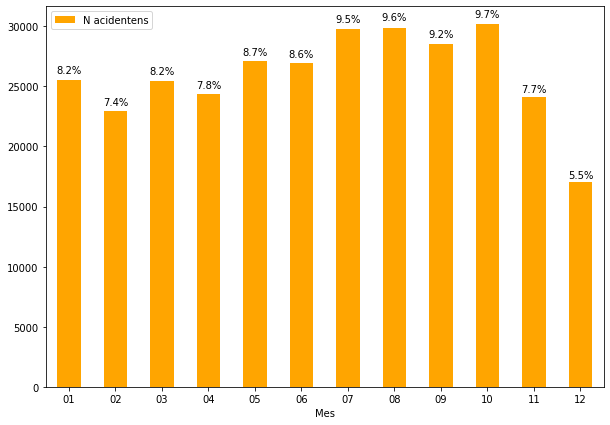

In [ ]:
percentages=[]

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(data)) 
    ax.annotate(f'{round(height/len(data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')


In [ ]:
new_data= pd.DataFrame(columns = data.columns)
datas=[]

for name, group in mes_groupby:
  d=group.sample(int(round(10000*percentages[int(name)-1]))) 
  new_data.append(d, ignore_index = True)
  datas.append(d)


new_data=datas[0]

for i in range(1,12):
 new_data=pd.concat([new_data,datas[i]], ignore_index = True)

In [ ]:
new_data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2013683017,2013:01:21 17:05:00,01/21/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Segunda-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,Stop,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
1,2011503904,2011:01:08 11:30:00,01/08/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sábado,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Calçada,Curva,Com inclinação,Sem berma ou impraticável,Em plena via,Direita
2,2010429188,2010:01:24 19:10:00,01/24/00,01/01/00,01/01/00,Polícia de Segurança Pública,90.0,90.0,Domingo,"39,510948",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Recta,Com inclinação,Berma não pavimentada,Em plena via,Direita
3,2010437471,2010:01:08 08:05:00,01/08/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sexta-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita
4,20171186548,2017:01:22 19:30:00,01/22/00,01/01/00,01/01/00,Polícia de Segurança Pública,100.0,100.0,Domingo,"38,742541",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Esquerda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20171213530,2016:12:19 12:30:00,01/19/00,12/01/00,01/01/00,Guarda Nacional Republicana,100.0,120.0,Segunda-Feira,"41,093645",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Esquerda
9996,2015912306,2014:12:06 05:15:00,01/06/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,"41,171294",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9997,2014878562,2014:12:22 11:30:00,01/22/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Segunda-Feira,"38,954291",...,Inexistentes,NÃO DEFINIDO,Passagem de peões,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9998,2010494595,2010:12:04 20:00:00,01/04/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sábado,"0,00",...,Inexistentes,No sentido decrescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda


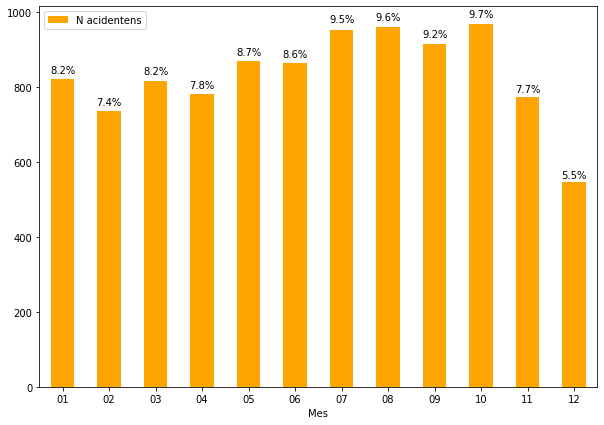

In [ ]:
percentages=[]
mes_groupby=new_data.groupby(new_data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(new_data)) 
    ax.annotate(f'{round(height/len(new_data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')

In [195]:
new_data.to_csv('acidentes.csv', index=False)

NameError: ignored

# **Data Understanding**

## **Pergunta 1**

1. Extract a random sample of 10000+ examples taking random examples from all files
from 2010 to 2019. Save the sample;

In [67]:
acidentes_df=pd.read_csv('acidentes.csv',sep = ',')

In [68]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id. Acidente                     5273 non-null   int64  
 1   Datahora                         5273 non-null   object 
 2   Dia                              5273 non-null   object 
 3   Mês                              5273 non-null   object 
 4   Hora                             5273 non-null   object 
 5   Entidades Fiscalizadoras         5273 non-null   object 
 6   Velocidade local                 5218 non-null   float64
 7   Velocidade geral                 5265 non-null   float64
 8   Dia da Semana                    5273 non-null   object 
 9   Latitude GPS                     4669 non-null   object 
 10  Longitude GPS                    4665 non-null   object 
 11  Num. Mortos a 30 dias            5273 non-null   int64  
 12  Num. Feridos graves 

In [69]:
import io
buffer = io.StringIO()
acidentes_df.info(buf=buffer)
s = buffer.getvalue()
with open("df_info.csv", "w",
          encoding="utf-8") as f:  
    f.write(s)

## **Pergunta 2**


2. Decide which (if any) characteristics should be normalized, discretized, or change format
in any way. Perform these transformations in the sample and save the new file
under a different name;

### Categorizaçao Periodos do Dia

In [70]:
acidentes_df['Periodo do Dia']=acidentes_df['Datahora'].str.split(' ').str[-1]     

## METER A COLUNA DATAHORA PARA DATETIME
acidentes_df['Periodo do Dia'] = pd.to_datetime(acidentes_df['Periodo do Dia'])
     

In [71]:

slots=['06:00:00','12:00:00','18:00:00']
hours=pd.to_datetime(slots)

day_slots=[]
for index in acidentes_df.index:
  
  if acidentes_df['Periodo do Dia'][index] < hours[0]:
    day_slots.append('Madrugada')
  elif (acidentes_df['Periodo do Dia'][index] >= hours[0]) & (acidentes_df['Periodo do Dia'][index] < hours[1]):
    day_slots.append('Manha')
  elif  (acidentes_df['Periodo do Dia'][index] >= hours[1]) & (acidentes_df['Periodo do Dia'][index] < hours[2]):
    day_slots.append('Tarde')
  else:
    day_slots.append('Noite')



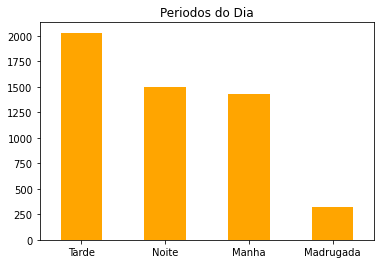

In [72]:
acidentes_df['Periodo do Dia']=day_slots
acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Periodos do Dia")

### Categorização Tipo de acidentes

In [73]:
accident_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Num. Mortos a 30 dias'][index]>0):    
    accident_type.append('muito grave')
  elif (acidentes_df['Num. Feridos graves a 30 dias'][index]>0) & (acidentes_df['Num. Mortos a 30 dias'][index]==0):
    accident_type.append('grave')
  else:
     accident_type.append('ligeiro')
print(len(accident_type))


5273


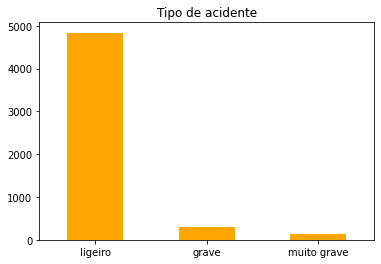

In [74]:
acidentes_df['Tipo de Acidente']=accident_type
acidentes_df['Tipo de Acidente'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Tipo de acidente")

### Categorização concelhos

In [75]:
acidentes_df=acidentes_df.replace('Sobral Monte Agraco','Sobral de Monte Agraco')
acidentes_df=acidentes_df.replace('Lagoa (Algarve)','Lagoa')
acidentes_df=acidentes_df.replace('Freixo Espada a Cinta','Freixo de Espada a Cinta')


In [76]:
nuts_site_df=pd.read_csv('nuts_site.csv',sep = ';', encoding="ISO-8859-1")
nuts_site_df= nuts_site_df[['NUTS II','CONCELHO']]
drop_elements= nuts_site_df[(nuts_site_df['NUTS II']=='REGIÃO AUTÓNOMA DOS AÇORES') | (nuts_site_df['NUTS II']=='REGIÃO AUTÓNOMA DA MADEIRA')].index
nuts_site_df.drop(drop_elements, inplace=True)
nuts_site_df = nuts_site_df.drop_duplicates(keep='first')
cols = nuts_site_df.select_dtypes(include=[object]).columns
nuts_site_df[cols] = nuts_site_df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
nuts_site_df





,NUTS II,CONCELHO
0,CENTRO,Agueda
11,CENTRO,Albergaria-a-Velha
17,CENTRO,Anadia
27,NORTE,Arouca
43,CENTRO,Aveiro
...,...,...
2816,NORTE,Tarouca
2823,CENTRO,Tondela
2842,CENTRO,Vila Nova de Paiva
2847,CENTRO,Viseu


In [77]:
for ind in acidentes_df['Concelho'].index:
  concelho =acidentes_df['Concelho'][ind]
  zona=nuts_site_df[(nuts_site_df['CONCELHO']==concelho)].values
  acidentes_df['Concelho'][ind]=zona[0][0]


<ipython-input-77-83936394670b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Concelho'][ind]=zona[0][0]


IndexError: ignored

In [ ]:
pd.unique(acidentes_df['Concelho'])


In [ ]:
acidentes_df=acidentes_df.rename(columns={"Concelho": "Zona"})

In [ ]:
acidentes_df['Zona'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Zona")

### Normalização velocidade

In [ ]:

velocidades=np.unique(acidentes_df['Velocidade local'])
velocidade_local_not_null=acidentes_df[acidentes_df['Velocidade local'].notnull()]
velocidade_local_null=acidentes_df[acidentes_df['Velocidade local'].isnull()]
velocidade_geral_null=acidentes_df[acidentes_df['Velocidade geral'].isnull()]

for ind in velocidade_local_null.index:
 
  if(pd.isnull(acidentes_df['Velocidade geral'][ind]) ):    
    tipo_via=acidentes_df['Tipos Vias'][ind]
    velocidade=[]
    velocidade += [acidentes_df['Velocidade local'][index] for index in velocidade_local_not_null.index if acidentes_df['Tipos Vias'][index] == tipo_via]
    mean_velocidade=(np.mean(velocidade))    
    closest = min(velocidades, key=lambda x: abs(x-mean_velocidade))
    acidentes_df['Velocidade local'][ind]= closest

  else:
    acidentes_df['Velocidade local'][ind]= acidentes_df['Velocidade geral'][ind]




### Vizualização 'Características Tecnicas1','Tipos Vias'

In [ ]:
groupby = acidentes_df.groupby([ 'Características Tecnicas1','Tipos Vias']).size()
print(groupby)

### Rename coluna Datahora

In [ ]:
acidentes_df['Data']=acidentes_df['Datahora'].str.split(' ').str[0]

### Categorização Natureza do acidente

In [ ]:
despiste=['Despiste sem dispositivo de retenção', 'Despiste simples','Despiste com colisão com veículo imobil. ou obstáculo','Despiste com capotamento', 'Despiste com dispositivo de retenção',
       'Despiste com transposição do dispositivo de retenção lateral',
       'Despiste com fuga']
colisão=['Colisão traseira com outro veículo em movimento','Colisão lateral com outro veículo em movimento'
,'Colisão frontal', 'Colisão com outras situações','Colisão choque em cadeia','Colisão com veiculo ou obstáculo na faixa de rodagem','Colisão com fuga']
atropelamento=['Atropelamento de peões', 'Atropelamento de animais',  'Atropelamento com fuga' ]
natureza_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Natureza'][index] in despiste ):    
    natureza_type.append('despiste')
  elif (acidentes_df['Natureza'][index] in colisão ):
   natureza_type.append('colisão')
  else:
    natureza_type.append('atropelamento')
print(len(natureza_type))

In [ ]:
acidentes_df['Natureza']=natureza_type

In [ ]:
acidentes_df['Natureza'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Natureza")

In [ ]:
acidentes_df['Sentidos'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Sentidos")
acidentes_df['Obstáculos'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Obstáculos")

In [ ]:
acidentes_df=acidentes_df.drop(['Id. Acidente','Datahora','Dia','Hora','Mês','Entidades Fiscalizadoras','Num. Mortos a 30 dias','Num. Feridos graves a 30 dias','Num. Feridos ligeiros a 30 dias', 'Obstáculos','Características Tecnicas1','Sentidos','Velocidade geral','Latitude GPS','Km','Longitude GPS','Distrito', 'Freguesia', 'Pov. Proxima','Nome arruamento','Cod Via'], axis=1)


In [ ]:
acidentes_df.info()

In [ ]:
acidentes_df

In [ ]:
acidentes_df.to_csv('acidentes_selected.csv', index=False)

## **Pergunta 3**

3. Verify which characteristics are seasonal (have different average values in different times of the year). Provide graphical views of these seasonal differences;

In [53]:
acidentes_df=pd.read_csv('acidentes_selected.csv',sep = ',')

FileNotFoundError: ignored

In [ ]:
acidentes_df

In [ ]:
#estacoes
estacoes_df = pd.to_datetime(acidentes_df['Data'], format='%Y:%m:%d')

s_spring=pd.to_datetime('20:03',format='%d:%m')
s_summer=pd.to_datetime('21:06',format='%d:%m')
s_autumn=pd.to_datetime('23:09',format='%d:%m')
s_winter=pd.to_datetime('21:12',format='%d:%m')

estacoes=[]
for index in estacoes_df.index:  
  if estacoes_df[index].month > s_spring.month and estacoes_df[index].month < s_summer.month:
    estacoes.append('Primavera')
  elif estacoes_df[index].month == s_spring.month and estacoes_df[index].month == s_summer.month:
    if estacoes_df[index].day >= s_spring.day and estacoes_df[index].day < s_summer.day:
      estacoes.append('Primavera')    
  elif estacoes_df[index].month > s_summer.month and estacoes_df[index].month < s_autumn.month:
    estacoes.append('Verao')
  elif estacoes_df[index].month == s_summer.month and estacoes_df[index].month == s_autumn.month:
    if estacoes_df[index].day >= s_summer.day and estacoes_df[index].day < s_autumn.day:
      estacoes.append('Verao')
  elif estacoes_df[index].month > s_autumn.month and estacoes_df[index].month < s_winter.month:
    estacoes.append('Outono')
  elif estacoes_df[index].month == s_autumn.month and estacoes_df[index].month == s_winter.month:
    if estacoes_df[index].day >= s_autumn.day and estacoes_df[index].day < s_winter.day:
      estacoes.append('Outono')
  else:
     estacoes.append('Inervno')







In [ ]:
estacoes_dict= dict((i, estacoes.count(i)) for i in estacoes)
plt.bar(estacoes_dict.keys(), estacoes_dict.values(),   width = 0.8, color = 'orange')
plt.title("N acidentes por estação do ano")


In [ ]:
#Periodo do dia

acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Periodos do Dia")

In [ ]:
#dias da semana
acidentes_df['Dia da Semana'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Dia da Semana")

In [ ]:
ano_groupby=acidentes_df.groupby(acidentes_df['Data'].str.split(':').str[0])
df = pd.DataFrame({'Ano':ano_groupby.groups.keys(), 'N acidentens':ano_groupby.size()})
ax = df.plot.bar(x='Ano', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

## **Pergunta 4**

4. Verify which characteristics are unbalanced (have much more elements of one class
than the others). Present graphical views of the distributions of some unbalanced
characteristics you deem relevant for the problem;

In [39]:
acidentes_df.columns

Index(['Id. Acidente', 'Datahora', 'Dia', 'Mês', 'Hora',
       'Entidades Fiscalizadoras', 'Velocidade local', 'Velocidade geral',
       'Dia da Semana', 'Latitude GPS', 'Longitude GPS',
       'Num. Mortos a 30 dias', 'Num. Feridos graves a 30 dias',
       'Num. Feridos ligeiros a 30 dias', 'Características Tecnicas1',
       'Cond Aderência', 'Distrito', 'Concelho', 'Freguesia', 'Pov. Proxima',
       'Nome arruamento', 'Tipos Vias', 'Cod Via', 'Estado Conservação', 'Km',
       'Factores Atmosféricos', 'Reg Circulação1', 'Intersecção Vias',
       'Localizações', 'Luminosidade', 'Marca Via', 'Natureza', 'Obras Arte',
       'Obstáculos', 'Sentidos', 'Sinais', 'Sinais Luminosos', 'Tipo Piso',
       'Traçado 1', 'Traçado 2', 'Traçado 3', 'Traçado 4', 'Via Trânsito',
       'Periodo do Dia', 'Tipo de Acidente'],
      dtype='object')

KeyError: ignored

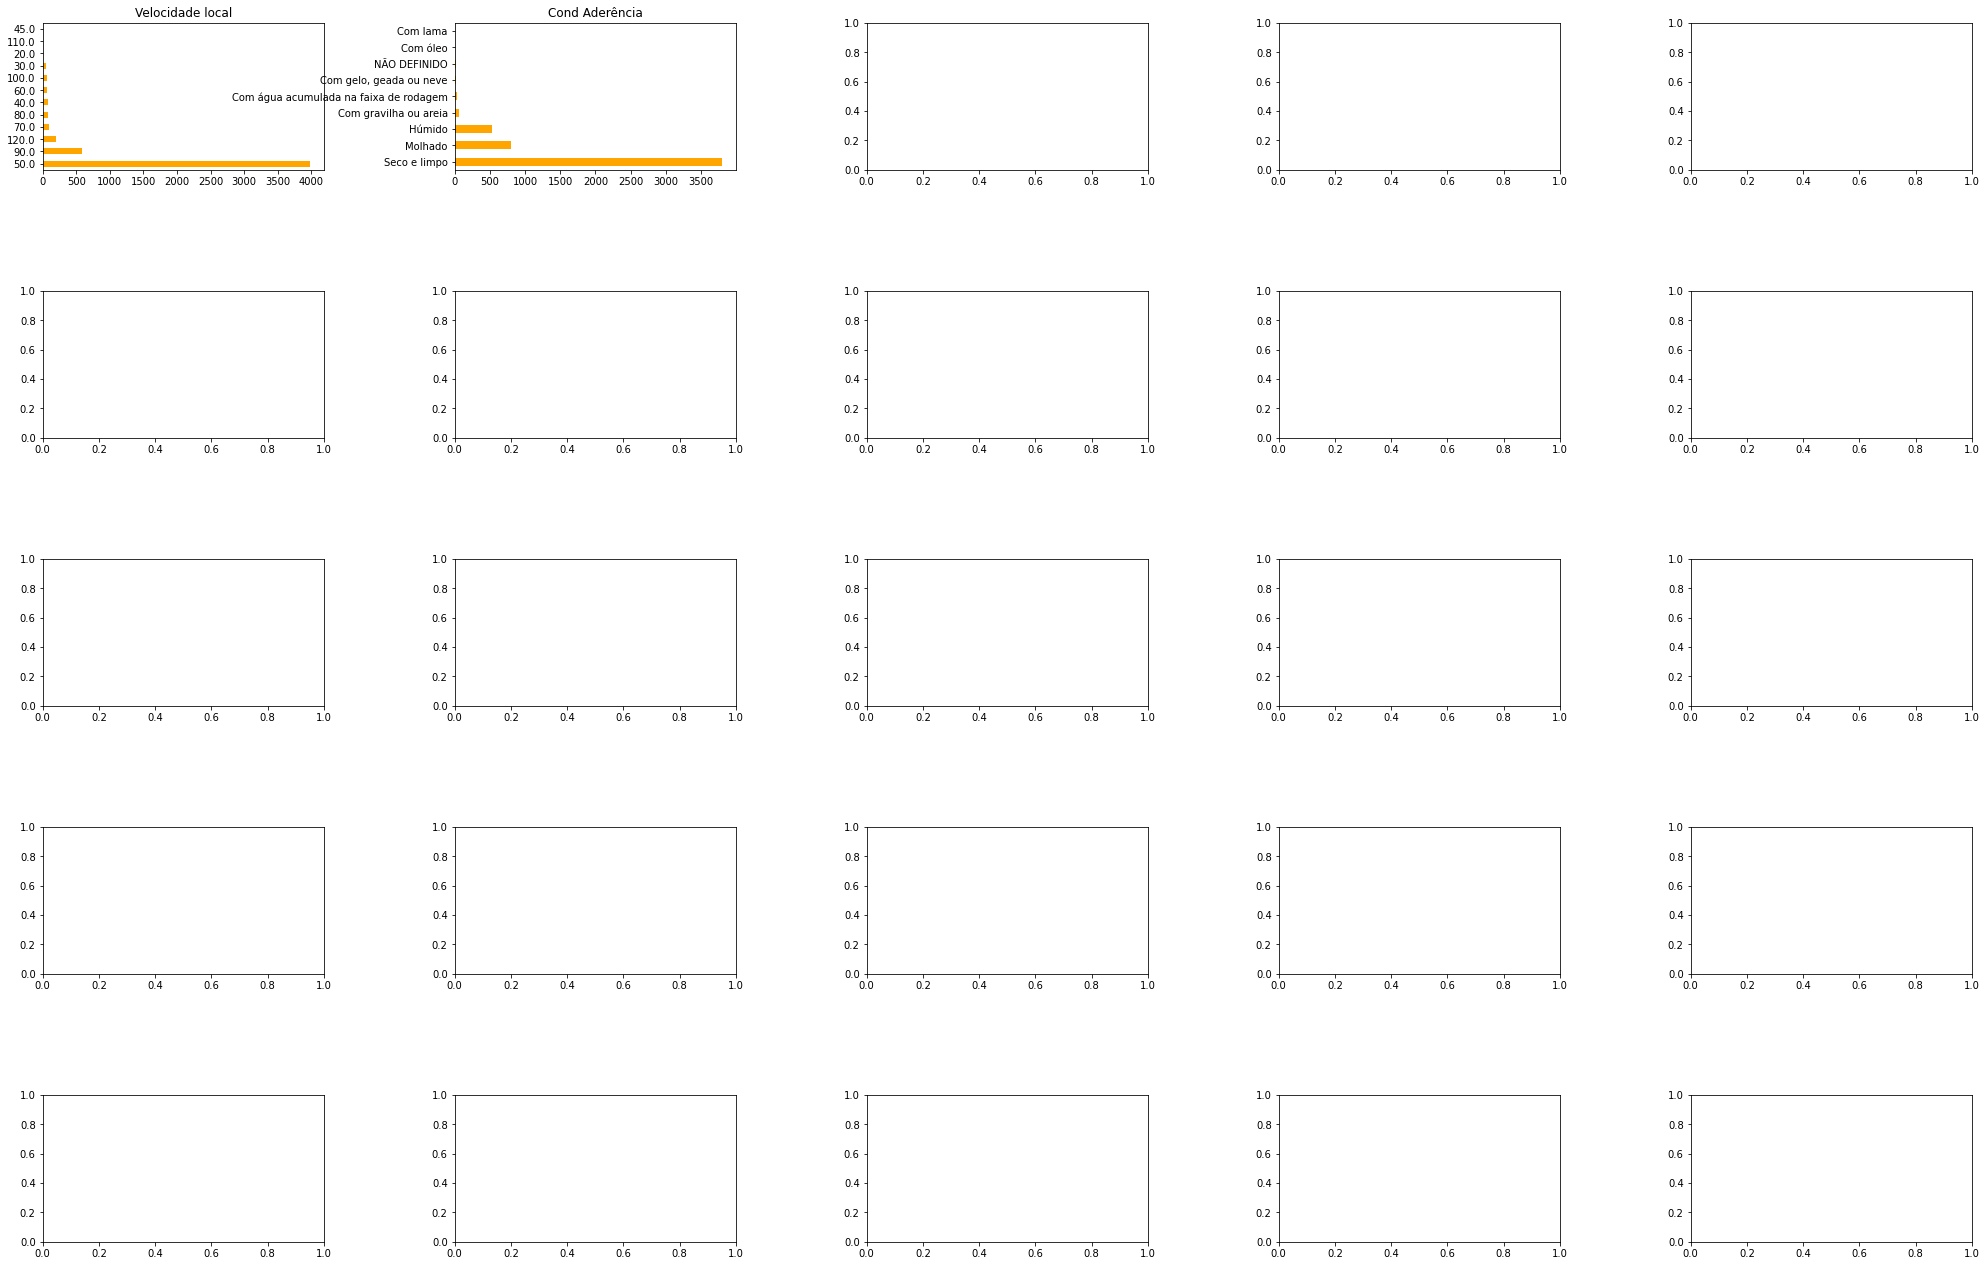

In [40]:
atributos = ['Velocidade local',  'Cond Aderência', 'Zona',
       'Tipos Vias', 'Estado Conservação', 'Factores Atmosféricos',
       'Reg Circulação1', 'Intersecção Vias', 'Localizações', 'Luminosidade',
       'Marca Via', 'Natureza', 'Obras Arte',
       'Sinais', 'Sinais Luminosos', 'Tipo Piso', 'Traçado 1', 'Traçado 2',
       'Traçado 3', 'Traçado 4', 'Via Trânsito', 'Periodo do Dia',
       'Tipo de Acidente' ]

fig, axes = plt.subplots(nrows = 5,ncols = 5,figsize = (30,20))
fig.tight_layout(pad=10.0)
for i, item in enumerate(atributos):
    if i < 5:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0,color='orange')
        
    elif i >=5 and i < 10:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0, color='orange')
        
    elif i >=10 and i < 15:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0, color='orange')
    elif i >=15 and i < 20:
        
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[3,i-15],rot = 0, color='orange')
    elif i >=20 and i < 25:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[4,i-20],rot = 0, color='orange')
   
    ax.set_title(item)

    #unbalanced  'Cond Aderência','Obstáculos','Obras Arte', 'Tipo Piso','Sinais Luminosos'

## **Pergunta 5**

5. Calculate correlations between variables and explain any high correlations found;
https://www.statology.org/correlation-between-categorical-variables/

Categoricas:
https://www.statstest.com/cramers-v-2/

**Cramer’s V**

The analysis will result in a Cramer’s V value and a p-value. Cramer’s V ranges from 0 to 1, where 0 indicates no relationship and 1 indicates perfect association

The p-value represents the chance of seeing our results if there was no actual relationship between our variables. A p-value less than or equal to 0.05 means that our result is statistically significant and we can trust that the difference is not due to chance alone.

In [12]:

def cramer_correl(feature1, feature2):
  l = acidentes_df.groupby([feature1, feature2]).size().unstack(fill_value=0)
  data = l.values
  X2 = stats.chi2_contingency(data, correction=False)[0]
  n = np.sum(data)
  minDim = min(data.shape)-1
  V = np.sqrt((X2/n) / minDim)
  return V



In [13]:
def cramer_matrix(acidentes_continuous):
  matrix=[]
  for  x in range(len(acidentes_continuous.columns)):
    line = []
    for  y in range(len(acidentes_continuous.columns)):      
      line.append(round(cramer_correl(acidentes_continuous.columns[x], acidentes_continuous.columns[y]),2))
    matrix.append(line)
  return matrix 


In [19]:
df = pd.DataFrame(
   {
      "x": [5, 2, 1, 9],
      "y": [4, 1, 5, 10],
      "z": [4, 1, 5, 0]
   }
)
print("Input DataFrame is:", df)

col=['y','z']
df1 =  df[df.columns.difference(['y','x'])]

print( "DataFrame without Column-y: ", df1)

Input DataFrame is:    x   y  z
0  5   4  4
1  2   1  1
2  1   5  5
3  9  10  0
DataFrame without Column-y:     z
0  4
1  1
2  5
3  0


In [22]:
acidentes_df.columns

Index(['Id. Acidente', 'Datahora', 'Dia', 'Mês', 'Hora',
       'Entidades Fiscalizadoras', 'Velocidade local', 'Velocidade geral',
       'Dia da Semana', 'Latitude GPS', 'Longitude GPS',
       'Num. Mortos a 30 dias', 'Num. Feridos graves a 30 dias',
       'Num. Feridos ligeiros a 30 dias', 'Características Tecnicas1',
       'Cond Aderência', 'Distrito', 'Concelho', 'Freguesia', 'Pov. Proxima',
       'Nome arruamento', 'Tipos Vias', 'Cod Via', 'Estado Conservação', 'Km',
       'Factores Atmosféricos', 'Reg Circulação1', 'Intersecção Vias',
       'Localizações', 'Luminosidade', 'Marca Via', 'Natureza', 'Obras Arte',
       'Obstáculos', 'Sentidos', 'Sinais', 'Sinais Luminosos', 'Tipo Piso',
       'Traçado 1', 'Traçado 2', 'Traçado 3', 'Traçado 4', 'Via Trânsito',
       'Periodo do Dia', 'Tipo de Acidente'],
      dtype='object')

In [21]:
acidentes_continuous = acidentes_df[acidentes_df.columns.difference(['Velocidade local','Data'])]
print(len(acidentes_continuous.columns), len(acidentes_df.columns))
m = cramer_matrix(acidentes_continuous)
dd = pd.DataFrame(m, index = acidentes_df.columns, columns = acidentes_df.columns)

44 45


<ipython-input-12-75c90678ac49>:7: RuntimeWarning: invalid value encountered in double_scalars
  V = np.sqrt((X2/n) / minDim)


ValueError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(50,50)) 
hm=sns.heatmap(dd, annot=True,ax=ax,annot_kws={'size': 30})
hm.set_xticklabels(hm.get_xmajorticklabels (), fontsize = 40)
hm.set_yticklabels(hm.get_ymajorticklabels (), fontsize = 40,rotation=360)



In [ ]:

!pip install dython


In [ ]:
from dython import nominal


# **Coisas**

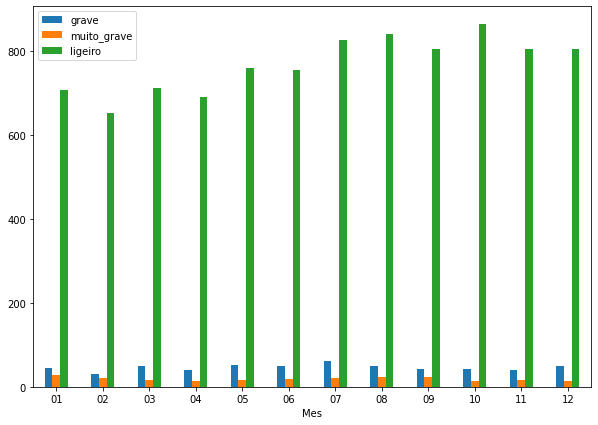

In [ ]:

type_mes_groupby = acidentes_df.groupby([ 'Tipo de Acidente','Mes']).size()
grave=type_mes_groupby['grave'].tolist()
muito_grave=type_mes_groupby['muito grave'].tolist()
ligeiro=type_mes_groupby['ligeiro'].tolist()

df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'grave':grave,'muito_grave':muito_grave,'ligeiro':ligeiro})
ax = df.plot.bar(x='Mes', y=['grave','muito_grave','ligeiro'], rot=0,figsize=(10, 7))



In [ ]:
data_graves= acidentes_df[(acidentes_df['Num. Feridos ligeiros a 30 dias']>0) &(acidentes_df['Num. Feridos graves a 30 dias']==0) & (acidentes_df['Num. Mortos a 30 dias']==0)]

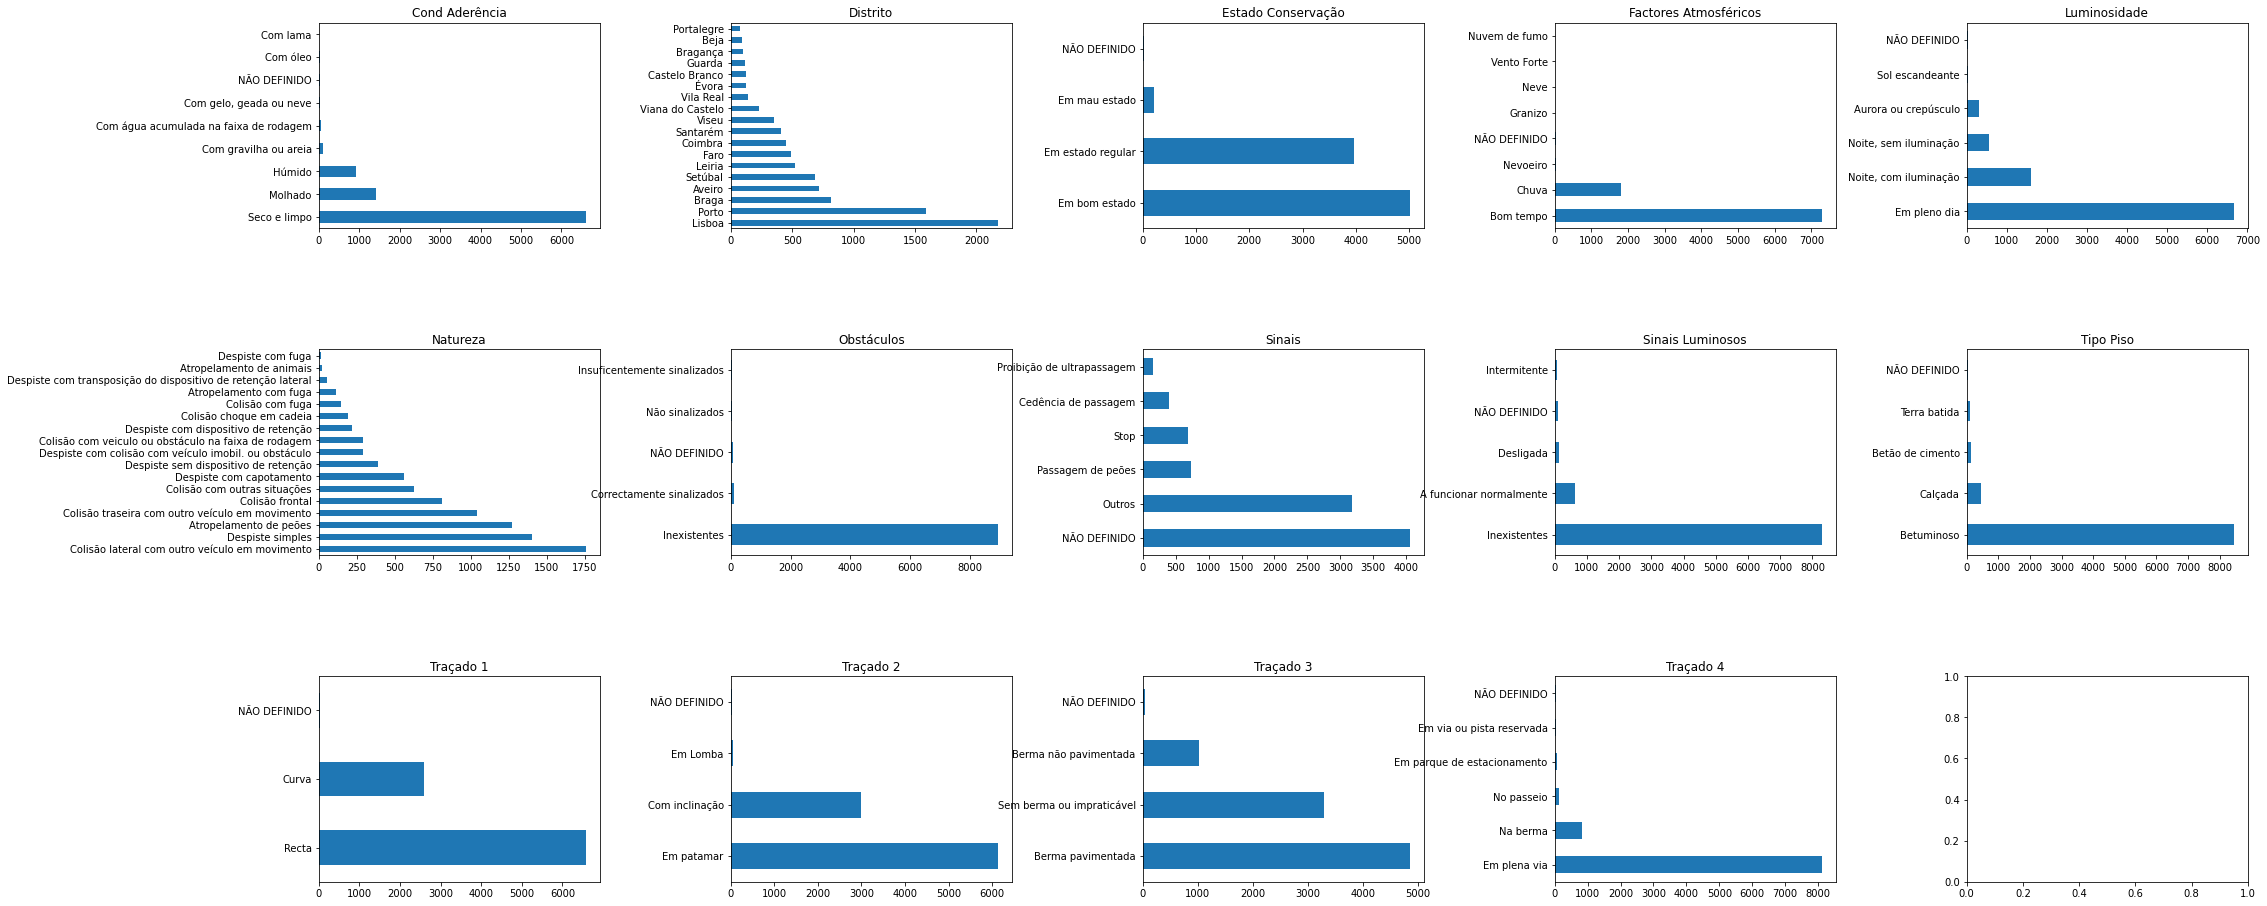

In [ ]:
services = ['Cond Aderência','Distrito','Estado Conservação','Factores Atmosféricos',
            'Luminosidade','Natureza','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Traçado 3','Traçado 4']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

In [ ]:
data['Datahora']=data['Datahora'].str.split(' ').str[-1]

In [ ]:
data=data.rename(columns={"Datahora": "Hora"})

In [ ]:
hours=['06:00:00','12:00:00','18:00:00']
d=pd.to_datetime(hours)

# mornin=data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]
# print(mornin)
feridos=[]
for ind in data.index:
  print(data['Hora'][ind])
  if data['Hora'][ind]<hours[0]:
    feridos.append('Madrugada')
  elif (data['Hora'][ind]>=hours[0]) & (data['Hora'][ind]<hours[1]):
    feridos.append('Manha')
  elif  (data['Hora'][ind]>=hours[1]) & (data['Hora'][ind]<hours[2]):
    feridos.append('Tarde')
  else:
    feridos.append('Noite')

print(feridos)

# conditions = [
#     (data[data['Hora'] <hours[0]]),
#     (data[(data['Hora']>=hours[0]) & (data['Hora']<hours[1])]),
#     ( data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]),
#     ( data[data['Hora']>=hours[2]])
# ]
# values=['Madrugada','Manha','Tarde','Noite']

# import numpy as np

# print(np.select(conditions, values))


14:15:00
11:15:00
12:45:00
11:50:00
19888    20:00:00
19888    18:40:00
Name: Hora, dtype: object


ValueError: ignored

In [ ]:
# feridos=['ligeiros', 'greves','mortes']
# n_feridos=[]
# n_feridos.append(data['Num. Feridos ligeiros a 30 dias'].sum())
# n_feridos.append(data['Num. Feridos graves a 30 dias'].sum())
# n_feridos.append(data['Num. Mortos a 30 dias'].sum())

# df = pd.DataFrame({'Feridos':feridos, 'N Feridos/Mortos':n_feridos})
# ax = df.plot.bar(x='Feridos', y='N Feridos/Mortos', rot=0)